<a href="https://colab.research.google.com/github/Osmayda/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**

Author: Osmayda Nino

##**Project Overview**

##**Load and Inspect Data**

Mount Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import pandas as pd

Load the Dataset

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo/Wk 2: Pandas for Data Manipulation/Datafiles/sales_predictions.csv'
df = pd.read_csv(filename)

Preview Data

Use df.info() method to preview the first rows of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Use df.head() to preview the first rows of data

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Clean Data**

Explore the data - what do you need to do to clean this data? Clean it!

How many rows and columns?

Find the shape of the dataframe

In [ ]:
df.shape

(8523, 12)

What are the datatypes of each variable?

Check the column data types using the dtypes attribute

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates? If so, drop any duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Count the duplicates

In [ ]:
df.duplicated().sum()

0

Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size have some missing(null) values.

Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

##Impute Missing Values with an average of that column. The item weight and the size of the outlet are import information for retailer to understand how properties of products play crucial roles in increasing sales.



#Clean Missing Item_Weight

Because Item_Weight is a nubmerical value, we should be able to use mean, median, or mode to impute values. 

We will use mean.

Since Item Weight is a numerical value we can use mean, median, or mode. We will use median as we have missing numbers.

Impute average for Item_Weight

In [ ]:
median_item_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_weight, inplace=True)

Confirm that there are no missing values after addressing them (Item_Weight)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Clean Missing Outlet_Size

In [ ]:
pd.unique(df['Outlet_Size'])

array(['Medium', nan, 'High', 'Small'], dtype=object)

Outlet-Size has 4 categories: Small, Medium, High, and nan. Mean, medium, or mode would not create a clearer picture for the size of the outlet therefore we will create a category called "missing".

In [ ]:
df['Outlet_Size'].fillna("missing", inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

Check the unique values and counts of the 'Item_Weight'

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Check the unique values and counts of the 'Item_Weight'

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Standardize the values in the Item_Fat_Content column

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean).

Show summary stats for all numeric columns

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##**Exploratory Data Analysis**

Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Histogram

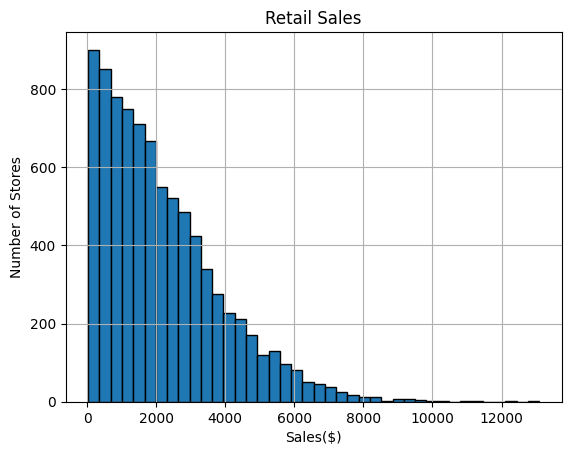

In [ ]:
#define a MatplotLib ax object using pandas' .hist(bin=30)
ax = df['Item_Outlet_Sales'].hist(bins=40, edgecolor='black')

# Set the Title
ax.set_title('Retail Sales')
# Set the X axis label
ax.set_xlabel('Sales($)')
# Set the Y axis label
ax.set_ylabel('Number of Stores');

The number of sales increase as the size of the store increases. The bigger the store the more it sells.

- Use a Boxplot to compare the outlet type to its sales. 

In [ ]:
# Display the descriptive statistics for the column
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

#Seaborn Box Plot

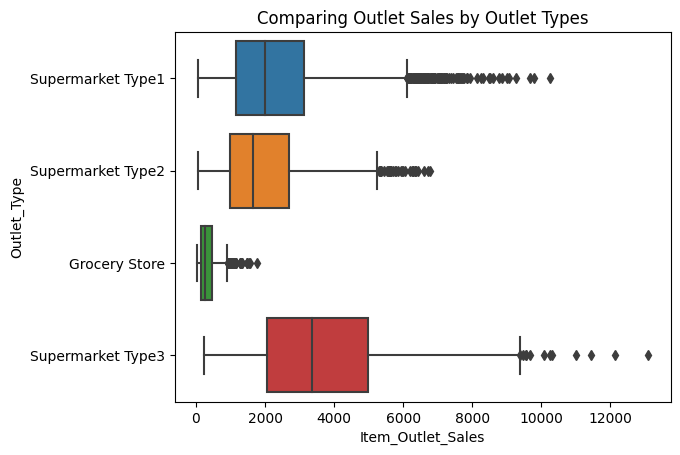

In [ ]:
# Define a MatplotLib ax object using seaborn.boxplot()
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type', data=df)

#Set the Title
ax.set_title('Comparing Outlet Sales by Outlet Types');

Each Outlet Type has many outliers. 
- Supermarket Type1 has the most outliers. 
- Supermarket Type 1 has the higher max. 
- Supermarket Type 1 has a bigger IQR.


#Heatmap

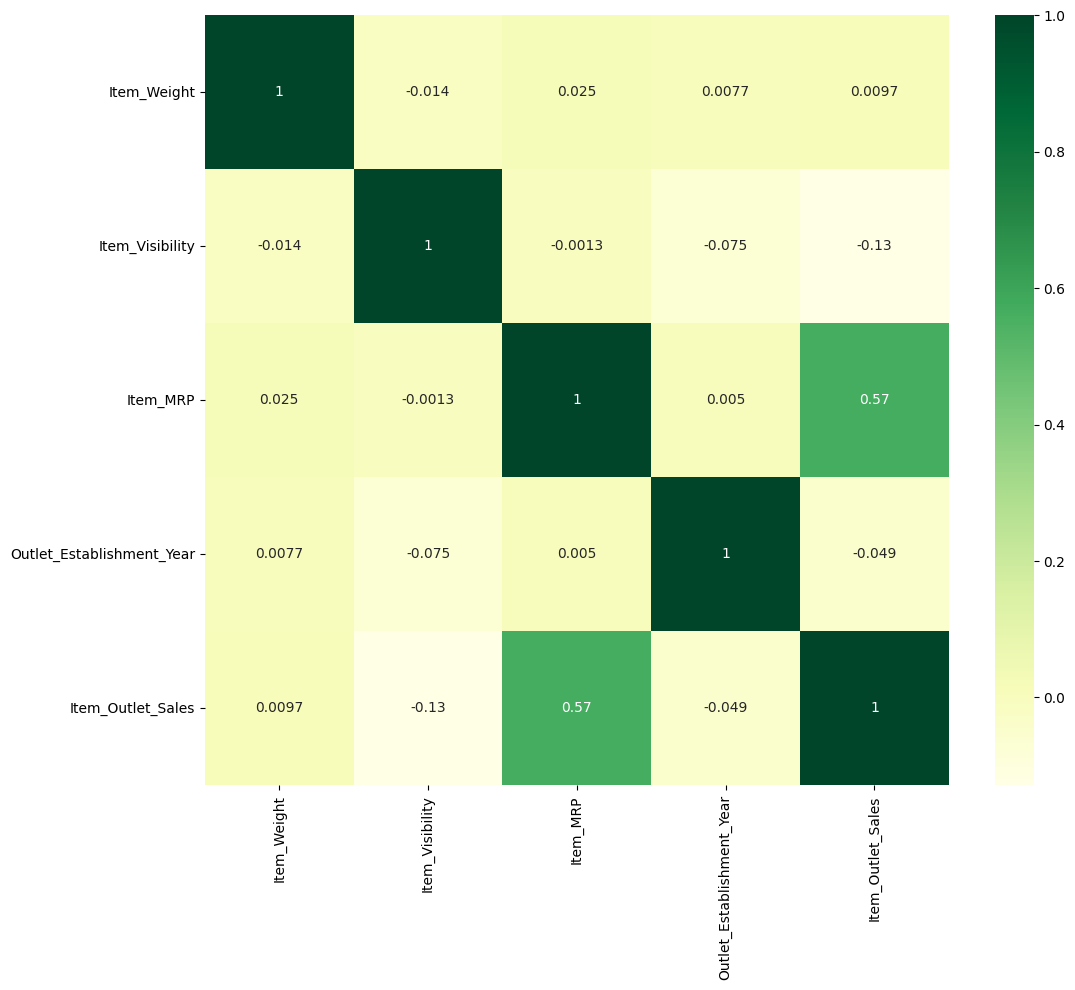

In [ ]:
# Define MatplotLib fig and ax objects using plt.subplots()
fig, ax = plt.subplots(figsize = (12,10))
corr = df.corr()

#Define a MatplotLib ax object using sns.heatmap()
ax = sns.heatmap(corr, cmap= 'YlGn', annot = True);

- There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales. 

##**Explanatory Data Analysis**

##**Possible Questions to Answer:**
1. What are the average product sales for each product category?
2. What were the sales like for Supermarket stores? 

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**1. What are the average product sales for each product category?**

In [ ]:
means = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

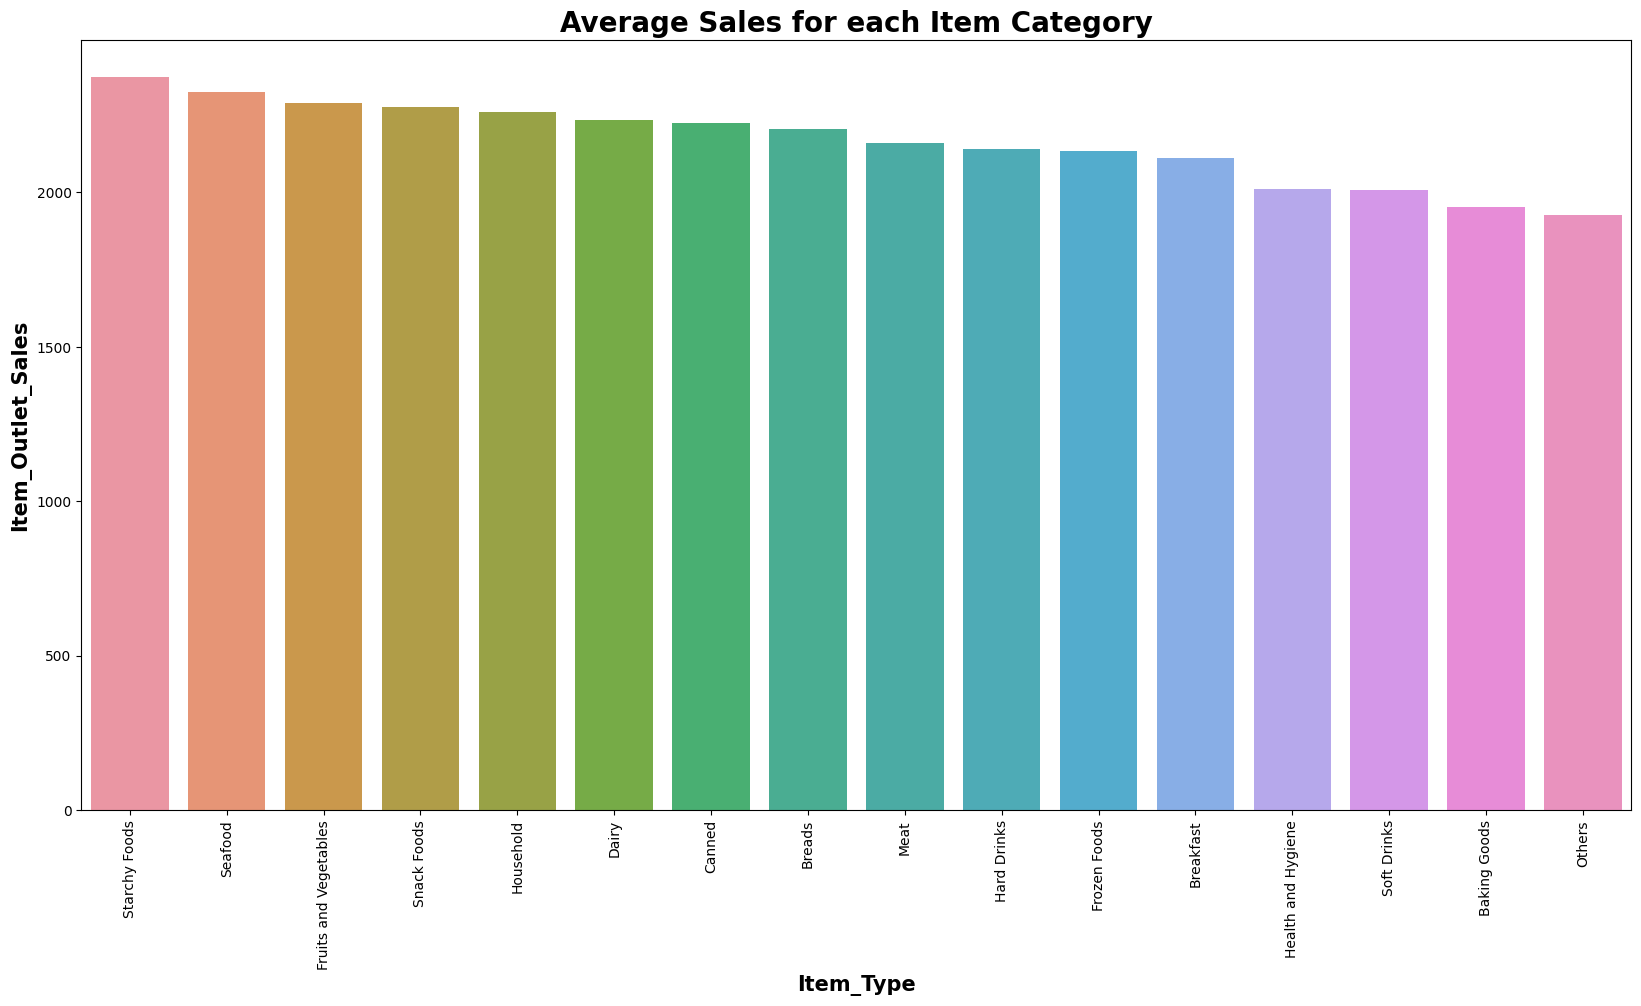

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales for each Item Category', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');

The top five highest average sales are as follows:
- Starchy Foods: $2,374.33

- Seafood: $2,326.07

- Fruits and Vegetables: $2,289.01

- Snack Foods: $2,277.32

- Household: $2,258.78

The bottom five average sales are as follows:
- Breakfast: $2,111.81

- Health and Hygiene: $2,010.00

- Soft Drinks: $2,006.51

- Baking Goods: $1,952.97

- Others: $1,926.14

**2. What were the sales like for Supermarket stores?**

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
outlet_type = df[df['Outlet_Type'] == 'Supermarket Type1']
outlet_type = outlet_type['Item_Type'].value_counts().sort_values(ascending = False).to_frame()
outlet_type.head()

,Item_Type
Fruits and Vegetables,805
Snack Foods,785
Household,597
Frozen Foods,572
Dairy,450


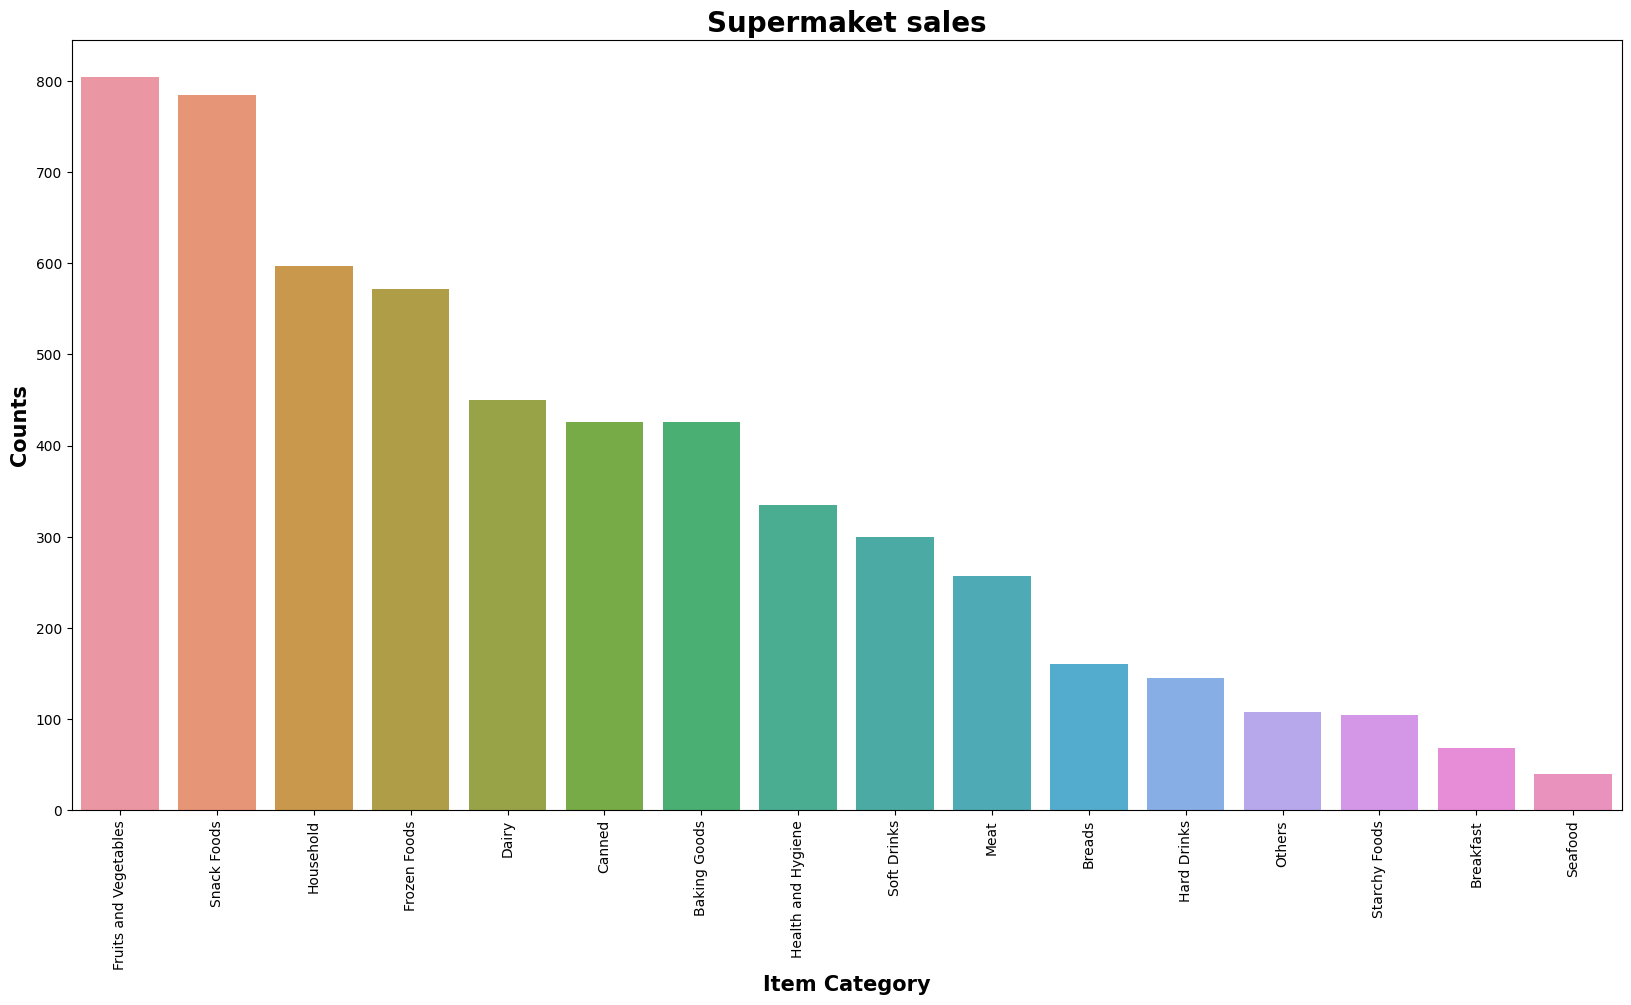

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=outlet_type,x = outlet_type.index, y = outlet_type['Item_Type'])
plt.xticks(rotation = 90)
ax.set_title('Supermaket sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Category', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold');

This graph shows that Supermarkets have the highest sales in fruit and vegetables and the lowest sales in Seafood. 

#**Preprocesing for Machine Learning**

##**Task:**

Will make predictions about future sales based on the data provided.

##**Import Libraries**

In [88]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Filter ALL Warnings
import warnings
warnings.filterwarnings('ignore')

# **Reload the Data**

In [89]:
#Load the data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2 Intro to Machine Learning/Week 1/datasets/sales_predictions_2023_Part 5 core assignment_github.csv')

In [90]:
#Display the first five rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Performing Preprocessing Steps**

In [91]:
# Make a copy of original to avoid manipulation
original = df.copy()

##**Check for Duplicated, Missing, or Erroneous Data**

In [92]:
# Check to see if there are any duplicate rows
original.duplicated().sum()

0

No duplicates found.

##**Handle Missing Values**

In [93]:
# Display the sum of missing values
original.isna().sum().sum()

3873

In [94]:
# Display the sum of missing values
original.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [95]:
# Display the percentage of missing values by column
print(original.isna().sum()/len(original)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


'Item_Weight' Column

- Missing 17.17% values
 - **Strategy:** 
  - replace missing values with the median value of the column
- **Justification**
    - This is less affected by outliers than strategy = 'mean'

In [96]:
# Replace the median value of the column
median_age = original['Item_Weight'].median()

In [97]:
# Replace the missing values with the column's 'median' value
original['Item_Weight'].fillna(value = median_age, inplace = True)

'Outlet_Size' Column

- Missing 28.28% values
- **Strategy:**
  - replace missing values with the value "Unknown"
- **Justification**
  - This typically will not create bias in favor of a specific label or class.

In [98]:
# Replace missing values with "Unknown"
original.Outlet_Size.fillna(value = 'Unknown', inplace=True)

In [99]:
#Drop 'Item_Identifier' and 'Item_Fat_Content column
original.drop(columns = ['Item_Identifier', 'Item_Fat_Content'], inplace = True)

In [100]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


There are no more missing values.

In [101]:
# Display descriptive statistics for all columns
original.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [102]:
# Display descriptive statistics for all columns
original.describe(include='object')

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523
unique,16,10,4,3,4
top,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,1232,935,2793,3350,5577


In [103]:
# Display the column names, count of non-null values, and their datatypes
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [104]:
# Inspect column names for Errors
original.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

No errors noted.

In [105]:
# Check for common syntax errors, typos, inconsistencies in strings that need to be fixed
# Create a series of the datatypes
data_types = original.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [106]:
# Loop through the index of object_data_types
for column in object_data_types.index:
  print(column)
  print(original[column].unique())
  print('\n')

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [115]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [116]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [117]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [118]:
df['Outlet_Establishment_Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Establishment_Year
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


##**Ordinal Encoding**

In [119]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

##**Split the Data (Validation Split)**

- Target: 'Item_Outlet_Sales'
- Features: the rest of the relevant variables

In [121]:
# Split X and y, you are predicting price
X = original.drop(columns=['Item_Outlet_Sales']).copy()
y = original['Item_Outlet_Sales'].copy()

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
# Display the first 5 values of the dataset
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,0.016645,Frozen Foods,120.9098,OUT045,2002,Unknown,Tier 2,Supermarket Type1


In [111]:
# Display the first (5) values of the dataset
y_train.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

##**Preprocessing Object**

In [122]:
# Instantiate the transformers
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [123]:
df['Outlet_Size'].dtype

dtype('O')

##**Instantiate Transformers**

In [124]:
#Transformers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
#Scaler
scaler = StandardScaler()
#OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

##**Instantiate Pipeline**

In [125]:
num_pipeline = make_pipeline(median_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [126]:
cat_pipeline = make_pipeline(freq_imputer, ohe)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

##**Instantiate ColumnTransformer**

In [127]:
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51738b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51707790>)])

##**Transform Data**

In [128]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51738b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51707790>)])

In [129]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##View Result

In [130]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 41)




array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [131]:
X_test_processed.shape

(2131, 41)

In [134]:
print(X_train_processed)
print(X_train_processed.shape)

[[ 0.82944552 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5686337  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.11896108  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.12582258 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.77785212 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.82944552 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]
(6392, 41)


In [135]:
print(X_test_processed)
print(X_test_processed.shape)

[[ 0.34338714 -0.77664625 -0.99881554 ...  1.          0.
   0.        ]
 [-1.16695037  0.1003166  -1.58519423 ...  1.          0.
   0.        ]
 [ 0.39080747 -0.48299432 -1.59578435 ...  1.          0.
   0.        ]
 ...
 [-1.12664309  1.21832428  1.09397975 ...  1.          0.
   0.        ]
 [-1.48466658 -0.77809567 -0.36679966 ...  1.          0.
   0.        ]
 [ 0.53306846 -0.77976293  0.11221189 ...  1.          0.
   0.        ]]
(2131, 41)
